# <b>Locating a Healthy Restaurant in Chicago</b>

### Introduction/Business Problem 

Chicago, IL, is widely known for its music, its theaters, the lake Michigan and specially for its restaurants, with Deep Dish Pizza being the most recognized of all its dishes. However, today people are searching for more healthy options and clearly US and Chicago don't offer a lot of them, and the ones that are already installed are very expensive for most of the people, meaning most of them couldn't eat on them every day. <br>  <br> This project means to search for zones/neighborhoods in the city of Chicago were a new healthy restaurant must me placed, and which then can then be used by any restaurant chain or new entrepreneurs in the food sector. For that we are going to use data from Foursquare to search the areas with more restaurants and also the kind, or categories, of food that you can find there. 

### Data

First of all I will examine the list of neighborhood in Chicago and create a data frame with it

### 1. Import libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### 2. Import Chicago Data by Zip Code

In [67]:
#Read data from of Chicago Zip Codes into a Pandas DataFrame
c_data=pd.read_html('http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?zip=606')
c_data=pd.concat([c_data[2], c_data[3]]).reset_index()

In [68]:
c_data.drop('index',axis=1, inplace=True)
c_data

,Zip Code,City,County
0,60601,Chicago,Cook County
1,60602,Chicago,Cook County
2,60603,Chicago,Cook County
3,60604,Chicago,Cook County
4,60605,Chicago,Cook County
5,60606,Chicago,Cook County
6,60607,Chicago,Cook County
7,60608,Chicago,Cook County
8,60609,Chicago,Cook County
9,60610,Chicago,Cook County


### 3. Remove Duplicate Values

In [70]:
chicago_data=c_data.drop_duplicates(subset ="Zip Code") 
chicago_data.reset_index(inplace=True,drop=True)
chicago_data

,Zip Code,City,County
0,60601,Chicago,Cook County
1,60602,Chicago,Cook County
2,60603,Chicago,Cook County
3,60604,Chicago,Cook County
4,60605,Chicago,Cook County
5,60606,Chicago,Cook County
6,60607,Chicago,Cook County
7,60608,Chicago,Cook County
8,60609,Chicago,Cook County
9,60610,Chicago,Cook County


### 4. Get Latitude an Longitude Values for each Zip Code zone

In [5]:
!pip install pgeocode
import pgeocode
print("Pgeocode imported.")

Pgeocode imported.


In [71]:
postal_codes=chicago_data['Zip Code'].apply(str)
nomi = pgeocode.Nominatim('US')
lat_lon=nomi.query_postal_code(list(postal_codes))

In [151]:
lat_long=lat_lon[['postal_code','latitude','longitude']].apply(pd.to_numeric)
n_chicago_data=chicago_data.merge(lat_long, left_on='Zip Code', right_on='postal_code').drop('postal_code', axis=1)
n_chicago_data.head()

,Zip Code,City,County,latitude,longitude
0,60601,Chicago,Cook County,41.8858,-87.6181
1,60602,Chicago,Cook County,41.8829,-87.6321
2,60603,Chicago,Cook County,41.8798,-87.6285
3,60604,Chicago,Cook County,41.8785,-87.6330
4,60605,Chicago,Cook County,41.8713,-87.6277


### 5. Map Each Zip Code zone in Chicago

In [73]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[41.874662, -87.630146], zoom_start=11)

# add markers to map
for lat, lng, label in zip(n_chicago_data['latitude'], n_chicago_data['longitude'], n_chicago_data['Zip Code']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

### 6. Use the Foursquare API to explore the neighborhoods

In [153]:
CLIENT_ID = 'J0JFQXISBYT1MTD01434KAX0L3ZJBGI0LQQQY3NMFSF2BOH3' # your Foursquare ID
CLIENT_SECRET = 'NHQTBYLPW53GOD5EVLG3PT434BMCOXH4BJI4QKS4D5IOM0JW' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 200 
radius = 700
search_query='Restaurant'
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 
                  'Zip Code Latitude', 
                  'Zip Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [154]:
chicago_venues = getNearbyVenues(names=n_chicago_data['Zip Code'],
                                   latitudes=n_chicago_data['latitude'],
                                   longitudes=n_chicago_data['longitude']
                                  )

In [155]:
print(chicago_venues.shape)
chicago_venues.head()

(1811, 7)


,Zip Code,Zip Code Latitude,Zip Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,60601,41.8858,-87.6181,Lakeshore East Park,41.886081,-87.617769,Park
1,60601,41.8858,-87.6181,Mariano's,41.885326,-87.618923,Grocery Store
2,60601,41.8858,-87.6181,Maggie Daley Ice Skating Ribbon,41.884093,-87.619374,Skating Rink
3,60601,41.8858,-87.6181,"Radisson Blu Aqua Hotel, Chicago",41.886308,-87.619921,Hotel
4,60601,41.8858,-87.6181,Eggy's,41.885517,-87.618902,Diner


### 7. Filter Venues Category with just Restaurants

In [84]:
chicago_restaurants=chicago_venues[(chicago_venues['Venue Category'].str.contains('Restaurant')) | (chicago_venues['Venue Category'].str.contains('Food'))
                                  | (chicago_venues['Venue Category'].str.contains('Pizza'))]
print(chicago_restaurants.shape)
chicago_restaurants.head()

(488, 7)


,Zip Code,Zip Code Latitude,Zip Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,60601,41.8858,-87.6181,The Palm Chicago,41.887033,-87.619468,Seafood Restaurant
11,60601,41.8858,-87.6181,Brown Bag Seafood Co.,41.884598,-87.618952,Seafood Restaurant
12,60601,41.8858,-87.6181,Minghin Cuisine,41.885381,-87.619045,Dim Sum Restaurant
16,60601,41.8858,-87.6181,Mezcalina,41.885647,-87.618991,Mexican Restaurant
22,60601,41.8858,-87.6181,Radisson Blu - Filini Restaurant and Bar,41.886385,-87.620102,Italian Restaurant


## Methodology

First, I will search for those zones in the city where there are more restaurants, because we all know that they should be there for a reason, more companies, more metro or bus stations or simply more residents. Then, I am going to explore the most common restaurant categories that could be found in that zone and for that I'm going to apply an Unsupervised Machine Learning Algorithm, particularly the K-means clusting algorithm. This is because I don't have labeled data and I want to identify similar zones in the city based on their restaurant offer.

### Identification of areas with the largest number of restaurants

In [85]:
number_chicago_restaurants=chicago_restaurants.groupby('Zip Code').count().sort_values('Venue', ascending=False)
number_chicago_restaurants.drop(['Zip Code Latitude', 'Zip Code Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis=1, inplace=True)
number_chicago_restaurants

,Venue
Zip Code,
60606,33
60611,33
60602,28
60603,24
60604,21
60654,20
60640,20
60614,19
60605,18


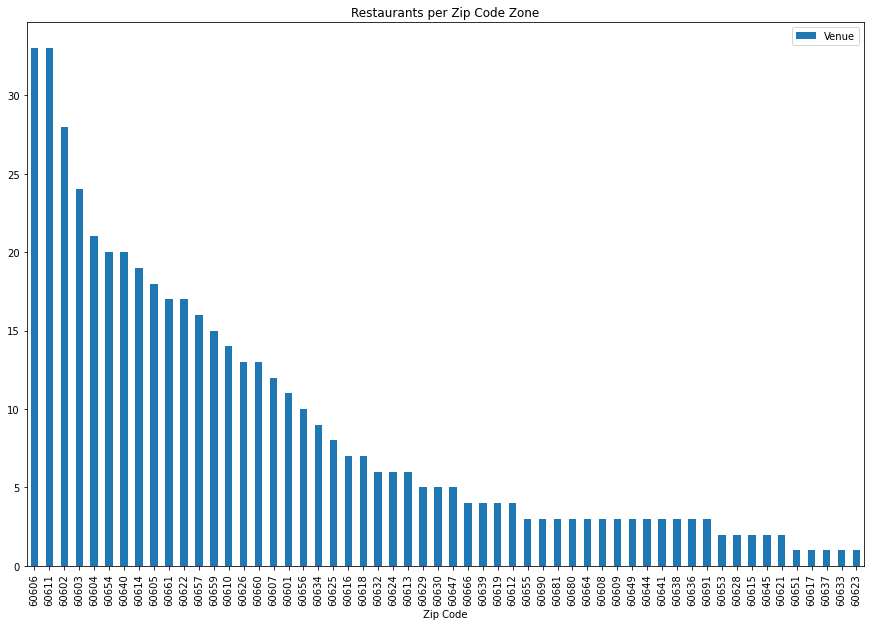

In [163]:
number_chicago_restaurants.plot(kind='bar', figsize=(15,10), title='Restaurants per Zip Code Zone')

Now I'm going top map the top 10 zones with more restaurants in the city, to see if I could find a pattern.

In [89]:
top_10_zones=number_chicago_restaurants.drop('Venue', axis=1).head(10)
top_10_zones

""
Zip Code
60606
60611
60602
60603
60604
60654
60640
60614
60605


In [90]:
t10=top_10_zones.apply(pd.to_numeric).reset_index()
filter_chicago_data=n_chicago_data[n_chicago_data['Zip Code'].isin(t10['Zip Code'])]
filter_chicago_data

,Zip Code,City,County,latitude,longitude
1,60602,Chicago,Cook County,41.8829,-87.6321
2,60603,Chicago,Cook County,41.8798,-87.6285
3,60604,Chicago,Cook County,41.8785,-87.6330
4,60605,Chicago,Cook County,41.8713,-87.6277
5,60606,Chicago,Cook County,41.8868,-87.6386
10,60611,Chicago,Cook County,41.8971,-87.6223
13,60614,Chicago,Cook County,41.9229,-87.6483
37,60640,Chicago,Cook County,41.9719,-87.6624
48,60654,Chicago,Cook County,41.8923,-87.6373
54,60661,Chicago,Cook County,41.8814,-87.6430


In [150]:
# create map of Chicago using latitude and longitude values
map_chicago_top_zones = folium.Map(location=[41.874662, -87.630146], zoom_start=11)

# add markers to map
for lat, lng, label in zip(filter_chicago_data['latitude'], filter_chicago_data['longitude'], filter_chicago_data['Zip Code']):
    label = folium.Popup('Zip Code: {}'.format(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago_top_zones)  
    
map_chicago_top_zones

With the map above, we can see that the areas with the most restaurants are those near downtown Chicago, and the rest are in the North Zone of the city, so my first recommendation would be to look for places near these areas.

Now i'm going to identify clusters depending on the restaurants categories of each zone, for that let's first create some dummy variables for each restaurant category

In [95]:
chicago_onehot = pd.get_dummies(chicago_restaurants[['Venue Category']], prefix="", prefix_sep="")
#.drop(['Zip Code'], axis=1)

# add neighborhood column back to dataframe
chicago_onehot['Zip Code'] = chicago_restaurants['Zip Code'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Zip Code,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
5,60601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11,60601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12,60601,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,60601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,60601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
chicago_grouped = chicago_onehot.groupby('Zip Code').mean().reset_index()
chicago_grouped

,Zip Code,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,60601,0.090909,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000,0.000000,0.090909,0.000000,0.000000,0.000,0.00,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000
1,60602,0.107143,0.000000,0.000000,0.000000,0.000,0.035714,0.000000,0.000000,0.035714,0.000000,0.0,0.000000,0.000000,0.035714,0.035714,0.000000,0.0,0.107143,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.035714,0.000000,0.000000,0.000,0.071429,0.035714,0.071429,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.000000
2,60603,0.166667,0.041667,0.000000,0.041667,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.041667,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000,0.041667,0.000000,0.083333,0.041667,0.000,0.00,0.083333,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.083333,0.000000,0.000000,0.0,0.083333,0.000000
3,60604,0.095238,0.000000,0.000000,0.047619,0.000,0.000000,0.000000,0.000000,0.047619,0.000000,0.0,0.000000,0.000000,0.047619,0.047619,0.000000,0.0,0.095238,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000,0.000000,0.047619,0.047619,0.000000,0.000,0.00,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.0,0.095238,0.047619
4,60605,0.166667,0.000000,0.000000,0.000000,0.000,0.055556,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.055556,0.055556,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.222222,0.000000,0.055556,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.111111,0.055556,0.0,0.000000,0.000000
5,60606,0.090909,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.030303,0.000000,0.000000,0.0,0.030303,0.000000,0.030303,0.000000,0.000000,0.0,0.030303,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.060606,0.000000,0.060606,0.000000,0.000000,0.000,0.060606,0.030303,0.030303,0.151515,0.000,0.00,0.000000,0.030303,0.000000,0.000000,0.030303,0.000000,0.090909,0.030303,0.000000,0.000000,0.030303,0.000000,0.030303,0.0,0.060606,0.060606
6,60607,0.000000,0.000000,0.000000,0.083333,0.000,0.000000,0.000000,0.083333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000,0.0

In [99]:
def return_most_common_venues(row, num_top_restaurants):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_restaurants]

In [141]:
num_top_restaurants = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip Code']
for ind in np.arange(num_top_restaurants):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zones_restaurants_sorted = pd.DataFrame(columns=columns)
zones_restaurants_sorted['Zip Code'] = chicago_grouped['Zip Code']

for ind in np.arange(chicago_grouped.shape[0]):
    zones_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_restaurants)

zones_restaurants_sorted.head()

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60601,Italian Restaurant,Food Truck,Seafood Restaurant,American Restaurant,Sushi Restaurant,Mexican Restaurant,Dim Sum Restaurant,Pizza Place,Ethiopian Restaurant,German Restaurant
1,60602,Vegetarian / Vegan Restaurant,American Restaurant,Food Court,Indian Restaurant,Mediterranean Restaurant,South American Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Italian Restaurant
2,60603,American Restaurant,Middle Eastern Restaurant,Food Court,Vegetarian / Vegan Restaurant,Italian Restaurant,Pizza Place,Sushi Restaurant,New American Restaurant,Falafel Restaurant,South American Restaurant
3,60604,Pizza Place,American Restaurant,Food Court,Vegetarian / Vegan Restaurant,Asian Restaurant,Cuban Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant
4,60605,Pizza Place,American Restaurant,Tapas Restaurant,Indian Restaurant,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant,Restaurant,Japanese Restaurant


### Cluster Neighborhoods

### Defining the number of clusters

In [139]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(chicago_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

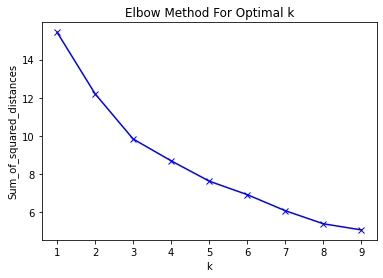

In [140]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Given that the value k after which the total intra-cluster variation tends to improve less is 3, we choose that for our model <br> Run k-means to cluster the Chicago areas into 3 clusters.

In [142]:
# set number of clusters
kclusters = 3

chicago_grouped_clustering = chicago_grouped.drop(["Zip Code"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0])

In [143]:
# add clustering labels
zones_restaurants_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = n_chicago_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.merge(zones_restaurants_sorted.set_index('Zip Code'), on='Zip Code')

chicago_merged.head() # check the last columns!

,Zip Code,City,County,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60601,Chicago,Cook County,41.8858,-87.6181,0,Italian Restaurant,Food Truck,Seafood Restaurant,American Restaurant,Sushi Restaurant,Mexican Restaurant,Dim Sum Restaurant,Pizza Place,Ethiopian Restaurant,German Restaurant
1,60602,Chicago,Cook County,41.8829,-87.6321,0,Vegetarian / Vegan Restaurant,American Restaurant,Food Court,Indian Restaurant,Mediterranean Restaurant,South American Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Italian Restaurant
2,60603,Chicago,Cook County,41.8798,-87.6285,0,American Restaurant,Middle Eastern Restaurant,Food Court,Vegetarian / Vegan Restaurant,Italian Restaurant,Pizza Place,Sushi Restaurant,New American Restaurant,Falafel Restaurant,South American Restaurant
3,60604,Chicago,Cook County,41.8785,-87.6330,0,Pizza Place,American Restaurant,Food Court,Vegetarian / Vegan Restaurant,Asian Restaurant,Cuban Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant
4,60605,Chicago,Cook County,41.8713,-87.6277,0,Pizza Place,American Restaurant,Tapas Restaurant,Indian Restaurant,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant,Restaurant,Japanese Restaurant


## Results

Now, let's visualize the resulting clusters

In [144]:
# create map
map_clusters = folium.Map(location=[41.874662, -87.630146], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, zipc, cluster in zip(chicago_merged['latitude'], chicago_merged['longitude'], chicago_merged['Zip Code'], chicago_merged['Cluster Labels']):
    label = folium.Popup('{}  - Cluster {}'.format(zipc, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### Cluster 1

In [145]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[0] + list(range(5, chicago_merged.shape[1]))]]

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60601,0,Italian Restaurant,Food Truck,Seafood Restaurant,American Restaurant,Sushi Restaurant,Mexican Restaurant,Dim Sum Restaurant,Pizza Place,Ethiopian Restaurant,German Restaurant
1,60602,0,Vegetarian / Vegan Restaurant,American Restaurant,Food Court,Indian Restaurant,Mediterranean Restaurant,South American Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Italian Restaurant
2,60603,0,American Restaurant,Middle Eastern Restaurant,Food Court,Vegetarian / Vegan Restaurant,Italian Restaurant,Pizza Place,Sushi Restaurant,New American Restaurant,Falafel Restaurant,South American Restaurant
3,60604,0,Pizza Place,American Restaurant,Food Court,Vegetarian / Vegan Restaurant,Asian Restaurant,Cuban Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant
4,60605,0,Pizza Place,American Restaurant,Tapas Restaurant,Indian Restaurant,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant,Restaurant,Japanese Restaurant
5,60606,0,New American Restaurant,American Restaurant,Seafood Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,South American Restaurant,Chinese Restaurant
6,60607,0,Thai Restaurant,Italian Restaurant,Pizza Place,Sushi Restaurant,Asian Restaurant,French Restaurant,Chinese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Greek Restaurant
8,60609,0,American Restaurant,Spanish Restaurant,Ethiopian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop
9,60610,0,Italian Restaurant,Restaurant,Pizza Place,American Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Falafel Restaurant
10,60611,0,American Restaurant,New American Restaurant,Restaurant,Italian Restaurant,Pizza Place,Fast Food Restaurant,Greek Restaurant,Ramen Restaurant,Cuban Restaurant,Chinese Restaurant


#### Cluster 2

In [146]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[0] + list(range(5, chicago_merged.shape[1]))]]

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,60612,1,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Vietnamese Restaurant,Falafel Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck
19,60621,1,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court
22,60624,1,Fast Food Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Falafel Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck
25,60628,1,Mexican Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court
31,60636,1,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court
32,60637,1,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court
36,60641,1,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Falafel Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck
38,60645,1,Mexican Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court


#### Cluster 3

In [147]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[0] + list(range(5, chicago_merged.shape[1]))]]

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,60608,2,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Falafel Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court
16,60617,2,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop
18,60619,2,Pizza Place,Caribbean Restaurant,Chinese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck
21,60623,2,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop
24,60626,2,Mexican Restaurant,Pizza Place,American Restaurant,Greek Restaurant,Asian Restaurant,Sushi Restaurant,Chinese Restaurant,German Restaurant,French Restaurant,Food Truck
26,60629,2,Mexican Restaurant,Latin American Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Falafel Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck
33,60638,2,American Restaurant,Mexican Restaurant,Pizza Place,Falafel Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court
34,60639,2,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Falafel Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court
41,60651,2,Pizza Place,Vietnamese Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop
44,60655,2,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Vietnamese Restaurant,Falafel Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Food Truck


With this results, and considering the kind of restaurants in each cluster, I assigned the following names to each one. <br> 1. Varied Food <br> 2. Fast Food <br> 3. Mexican & Italian Food

## Conclusions

With this project I discover: First, that most of the restaurants in Chicago are located near downtown, besides other cities where restaurants tend to be located around some residential zones or near waterfront streets. Second, using a K-means clustering model, with 3 clusters, we observed that restaurants in downtown are usually varied in their food categories possibly meaning that people working/living in that zones are willing to try different options.
Therefore, my recommendation will be to first focus on search for a place near downtown (Zip Codes: 60606, 60611, 60602, 60603, 60604).. however given that most of the restaurants are in that zone it may be difficult to find a good spot at a reasonable price, so in case they find one the North Zone is alway a good option, specially Zip Codes 60614 or 60640.